<a href="https://colab.research.google.com/github/thalisrocha/Markovian-models/blob/main/TP1_MRF_quest22_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PW 1 - Markovian models  

Session 2022

Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

You have to fill by hand-writing the printed version of the practical work and upload the filled jupyter notebook on e-campus.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$V_c(0,1)=V_c(1,0)=+\beta$ and $V_c(1,1)=V_c(0,0)=0$ (the potential for singleton clique is 0).


In [ ]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

In [ ]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1
(the answer should be written manually on your paper report)

In [ ]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).



#A2
(the answer should be written manually on your paper report)


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



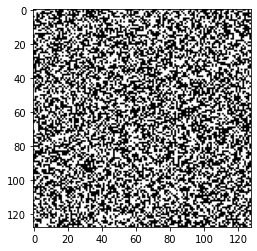

In [ ]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [ ]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= 0
            if im_bin[i1,j] == 1:
              Ureg0+=beta_reg
            if im_bin[i2,j]==1:
              Ureg0+=beta_reg
            if im_bin[i,j1]==1:
              Ureg0+=beta_reg
            if im_bin[i,j2]==1:
              Ureg0+=beta_reg

            p0=math.exp(-Ureg0);
        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= 0
            if im_bin[i1,j] == 0:
              Ureg1+=beta_reg
            if im_bin[i2,j]==0:
              Ureg1+=beta_reg
            if im_bin[i,j1]==0:
              Ureg1+=beta_reg
            if im_bin[i,j2]==0:
              Ureg1+=beta_reg

            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1
    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

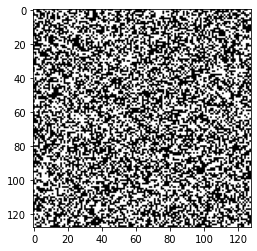

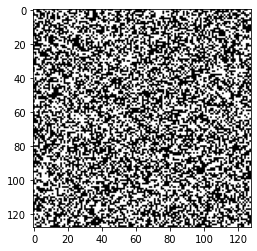

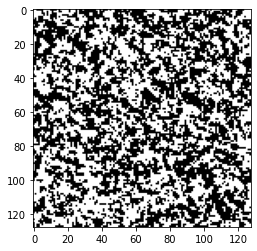

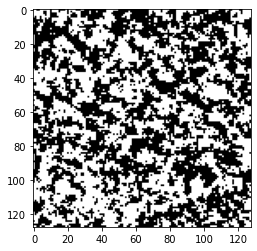

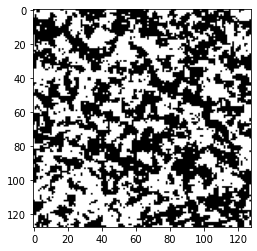

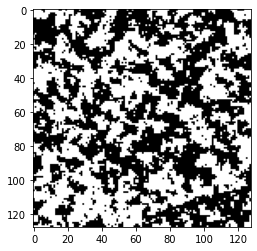

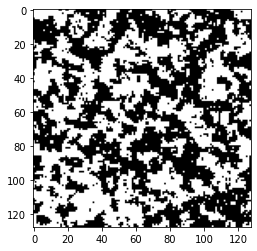

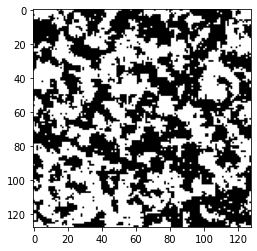

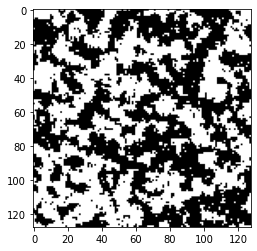

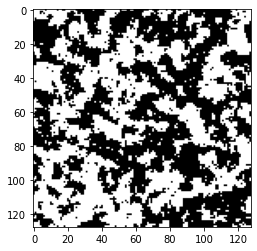

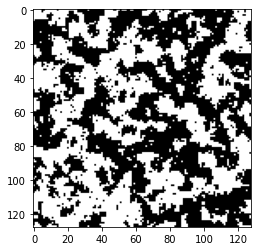

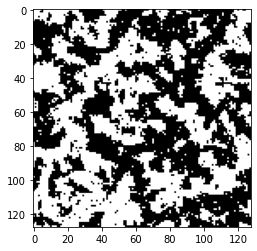

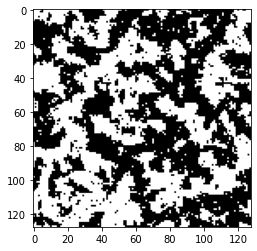

In [ ]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 1

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3
(the answer should be written manually on your paper report)


#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

#A4
(the answer should be written manually on your paper report)


#Q5
Which image minimizes the overall energy for this model?

#A5
(the answer should be written manually on your paper report)



#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

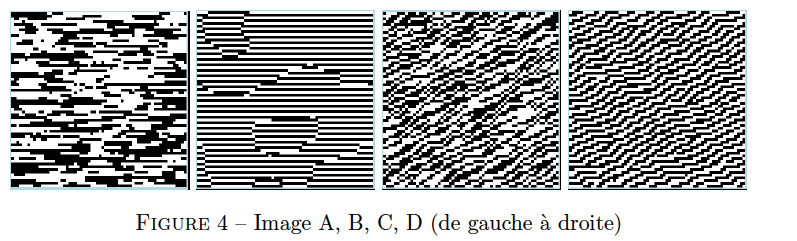

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.


Modify your program to obtain these results
(you can copy and paste the previous cells).


In [ ]:
def echan(im_bin,beta_reg, orientation, dif=True):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):

          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
          i1=(i-1)%im_bin.shape[0]
          i2=(i+1)%im_bin.shape[0]
          j1=(j-1)%im_bin.shape[1]
          j2=(j+1)%im_bin.shape[1]

          if orientation == "horizontal" and dif==True:
          # complete the calculation of energies and associated probabilities
          # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= 0
            if im_bin[i1,j] == 1:
              Ureg0+=beta_reg
            if im_bin[i2,j]==1:
              Ureg0+=beta_reg

            p0=math.exp(beta_reg);

            Ureg1= 0
            if im_bin[i1,j] == 0:
              Ureg1+=beta_reg
            if im_bin[i2,j]==0:
              Ureg1+=beta_reg

            p1=math.exp(beta_reg);
          if orientation == "horizontal" and dif==False:
            Ureg0= 0
            if im_bin[i1,j] == 0:
              Ureg0+=beta_reg
            if im_bin[i2,j]==0:
              Ureg0+=beta_reg

            p0=math.exp(beta_reg);

            Ureg1= 0
            if im_bin[i1,j] == 1:
              Ureg1+=beta_reg
            if im_bin[i2,j]==1:
              Ureg1+=beta_reg

            p1=math.exp(beta_reg);

          if orientation == "vertical" and dif==True:
          # energy and non-normalized proba when the pixel is put in class 1
            Ureg0= 0
            if im_bin[i,j1]==1:
              Ureg0+=beta_reg
            if im_bin[i,j2]==1:
              Ureg0+=beta_reg

            p0=math.exp(beta_reg);

            Ureg1= 0
            if im_bin[i,j1]==0:
              Ureg1+=beta_reg
            if im_bin[i,j2]==0:
              Ureg1+=beta_reg

            p1=math.exp(beta_reg);

          if orientation == "vertical" and dif==False:
          # energy and non-normalized proba when the pixel is put in class 1
            Ureg0= 0
            if im_bin[i,j1]==0:
              Ureg0+=beta_reg
            if im_bin[i,j2]==0:
              Ureg0+=beta_reg

            p0=math.exp(beta_reg);

            Ureg1= 0
            if im_bin[i,j1]==1:
              Ureg1+=beta_reg
            if im_bin[i,j2]==1:
              Ureg1+=beta_reg

            p1=math.exp(beta_reg);

          if orientation == "diagonal1" and dif==True:
          # energy and non-normalized proba when the pixel is put in class 1
            Ureg0= 0
            if im_bin[i1,j1]==1:
              Ureg0+=beta_reg
            if im_bin[i2,j2]==1:
              Ureg0+=beta_reg

            p0=math.exp(beta_reg);

            Ureg1= 0
            if im_bin[i1,j1]==0:
              Ureg1+=beta_reg
            if im_bin[i2,j2]==0:
              Ureg1+=beta_reg

            p1=math.exp(beta_reg);
          if orientation == "diagonal1" and dif==False:
          # energy and non-normalized proba when the pixel is put in class 1
            Ureg0= 0
            if im_bin[i1,j1]==0:
              Ureg0+=beta_reg
            if im_bin[i2,j2]==0:
              Ureg0+=beta_reg

            p0=math.exp(beta_reg);

            Ureg1= 0
            if im_bin[i1,j1]==1:
              Ureg1+=beta_reg
            if im_bin[i2,j2]==1:
              Ureg1+=beta_reg

            p1=math.exp(beta_reg);
          if orientation == "diagonal2" and dif==False:
          # energy and non-normalized proba when the pixel is put in class 1
            Ureg0= 0
            if im_bin[i2,j1]==0:
              Ureg0+=beta_reg
            if im_bin[i1,j2]==0:
              Ureg0+=beta_reg

            p0=math.exp(beta_reg);

            Ureg1= 0
            if im_bin[i2,j1]==1:
              Ureg1+=beta_reg
            if im_bin[i1,j2]==1:
              Ureg1+=beta_reg

            p1=math.exp(beta_reg);
          if orientation == "diagonal2" and dif==True:
          # energy and non-normalized proba when the pixel is put in class 1
            Ureg0= 0
            if im_bin[i2,j1]==1:
              Ureg0+=beta_reg
            if im_bin[i1,j2]==1:
              Ureg0+=beta_reg

            p0=math.exp(beta_reg);

            Ureg1= 0
            if im_bin[i2,j1]==0:
              Ureg1+=beta_reg
            if im_bin[i1,j2]==0:
              Ureg1+=beta_reg

            p1=math.exp(beta_reg);

        # sampling according to the normalized probabilities. NB: the normalization is done here
          if (p0+p1!=0.):
              if(random.uniform(0,1)<p0/(p0+p1)):
                  im_bin[i,j]=0
              else :
                  im_bin[i,j]=1

    return im_bin

#A7
(the answer should be written manually on your paper report)


#Q8

Modify your program to define an Ising model with  diagonal attractive potentials only (the other potentials are zero). Comment on the result.

#A8
(the answer should be written manually on your paper report)
